In [21]:
import sqlite3
import pandas as pd
# Connect to the SQLite database file
conn = sqlite3.connect('Database.db')


cursor = conn.cursor()

# Query to retrieve table names
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

# Fetch all table names
tables = cursor.fetchall()

# Print the table names
for table in tables:
    print(table[0])

# Close the connection
conn.close()

conn = sqlite3.connect('Database.db')
df = pd.read_sql_query('Select * from Fraud_detection' , conn)
print(df.columns)


Electric_cars
Fraud_detection
Heart_disease
Insurance_Prediction
New_Delhi_Reviews
Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


In [22]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [23]:
df.shape

(6362620, 11)

In [24]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style = 'white')

In [28]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [29]:
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [30]:
df['isFraud'].value_counts()[1]

np.int64(8213)

In [31]:
df.shape[0]

6362620

In [32]:
(df['isFraud'].value_counts()[1]/df.shape[0])*100

np.float64(0.12908204481801522)

In [13]:
round((df['isFraud'].value_counts()[1]/df.shape[0])*100,2)

np.float64(0.13)

In [33]:
df['type'].value_counts()

type
CASH_OUT    2165868
PAYMENT     2082597
CASH_IN     1354742
TRANSFER     515688
             203603
DEBIT         40122
Name: count, dtype: int64

In [34]:
# Count missing values
df['type'].isnull().sum()

# Show rows with missing type
df[df['type'].isnull()]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [35]:
# Replace NaN or empty with 'UNKNOWN'
df['type'] = df['type'].fillna('UNKNOWN')
df['type'] = df['type'].replace('', 'UNKNOWN')

In [36]:
df['type'].value_counts()

type
CASH_OUT    2165868
PAYMENT     2082597
CASH_IN     1354742
TRANSFER     515688
UNKNOWN      203603
DEBIT         40122
Name: count, dtype: int64

In [37]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

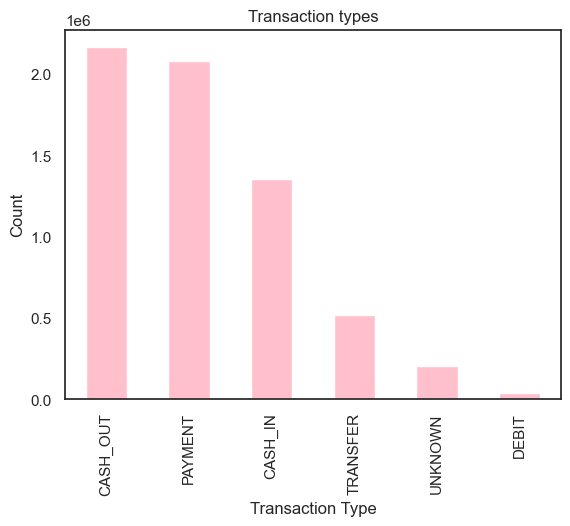

In [38]:
df['type'].value_counts().plot(kind = 'bar',color = 'pink')
plt.title("Transaction types")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

In [39]:
print(df.head())
print(df.dtypes)
print(df['type'].unique())
print(df['isFraud'].unique())

  step      type    amount     nameOrig oldbalanceOrg newbalanceOrig  \
0    1   PAYMENT   9839.64  C1231006815      170136.0      160296.36   
1    1   PAYMENT   1864.28  C1666544295       21249.0       19384.72   
2    1  TRANSFER     181.0  C1305486145         181.0            0.0   
3    1  CASH_OUT     181.0   C840083671         181.0            0.0   
4    1   PAYMENT  11668.14  C2048537720       41554.0       29885.86   

      nameDest oldbalanceDest newbalanceDest isFraud isFlaggedFraud  
0  M1979787155            0.0            0.0       0              0  
1  M2044282225            0.0            0.0       0              0  
2   C553264065            0.0            0.0       1              0  
3    C38997010        21182.0            0.0       1              0  
4  M1230701703            0.0            0.0       0              0  
step              object
type              object
amount            object
nameOrig          object
oldbalanceOrg     object
newbalanceOrig    obje

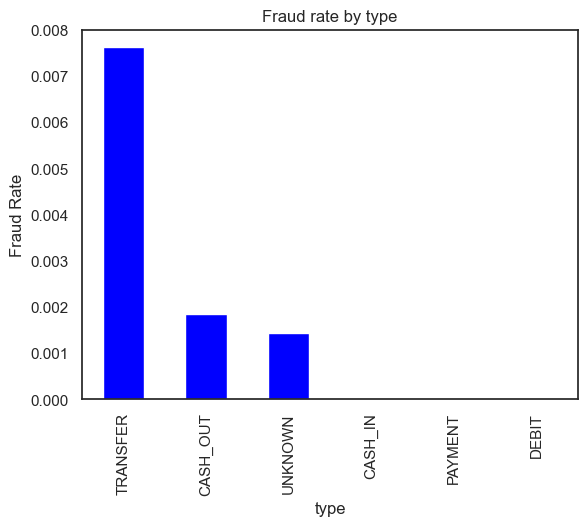

In [40]:
df['isFraud'] = pd.to_numeric(df["isFraud"],errors = "coerce")
fraud_type = df.groupby("type")["isFraud"].mean().sort_values(ascending = False)
fraud_type.plot(kind = 'bar',color = 'blue')
plt.title("Fraud rate by type")
plt.ylabel("Fraud Rate")
plt.show()

In [41]:
numeric_columns = ["step","amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric,errors = 'coerce')

In [42]:
df["amount"].describe()

count    6.362620e+06
mean     1.798619e+05
std      6.038582e+05
min      0.000000e+00
25%      1.338957e+04
50%      7.487194e+04
75%      2.087215e+05
max      9.244552e+07
Name: amount, dtype: float64

In [43]:
df["amount"].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

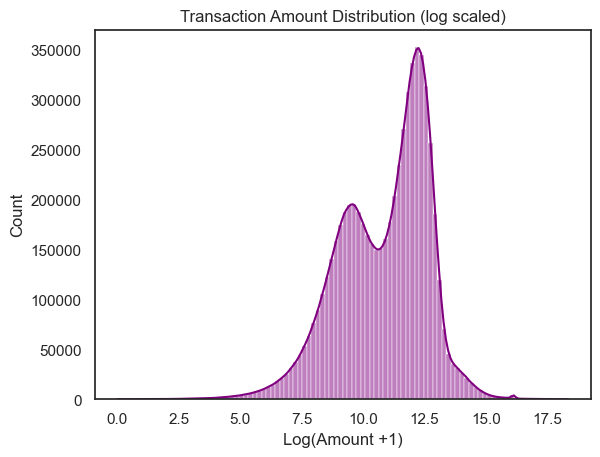

In [45]:
sns.histplot(np.log1p(df['amount']),bins = 100,kde = True,color = "Purple")
plt.title("Transaction Amount Distribution (log scaled)")
plt.xlabel("Log(Amount +1)")
plt.show()

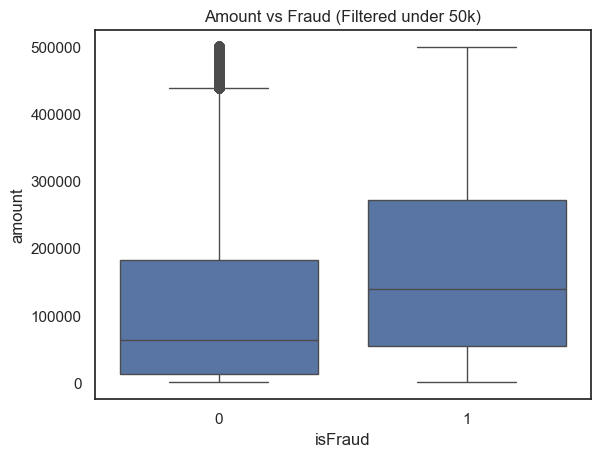

In [46]:
sns.boxplot(data = df[df["amount"]<500000],x = 'isFraud',y = "amount")
plt.title("Amount vs Fraud (Filtered under 50k)")
plt.show()

In [47]:
df["balanceDiffOrig"] = df["oldbalanceOrg"]-df["newbalanceOrig"]
df["balanceDiffDest"] = df["oldbalanceDest"]-df["newbalanceDest"]

In [48]:
df["balanceDiffOrig"]<0

0          False
1          False
2          False
3          False
4          False
           ...  
6362615    False
6362616    False
6362617    False
6362618    False
6362619    False
Name: balanceDiffOrig, Length: 6362620, dtype: bool

In [49]:
(df["balanceDiffOrig"]<0).sum()

np.int64(1340538)

In [50]:
df["balanceDiffDest"]<0

0          False
1          False
2          False
3          False
4          False
           ...  
6362615     True
6362616    False
6362617     True
6362618    False
6362619     True
Name: balanceDiffDest, Length: 6362620, dtype: bool

In [51]:
(df["balanceDiffDest"]<0).sum()

np.int64(2716503)

In [52]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0


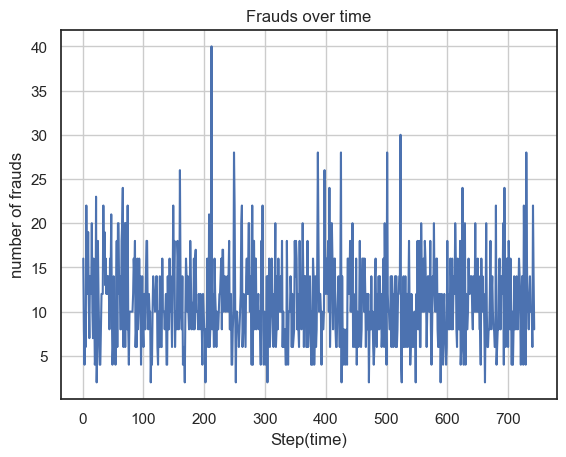

In [53]:
fraud_per_step = df[df["isFraud"] ==1]["step"].value_counts().sort_index()
plt.plot(fraud_per_step.index ,fraud_per_step.values, label = "fraud per step")
plt.xlabel("Step(time)")
plt.ylabel("number of frauds")
plt.title("Frauds over time")
plt.grid(True)
plt.show()


In [54]:
df.drop(columns = "step",inplace = True)

In [55]:
df.head(5)

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [56]:
top_money_senders = df["nameOrig"].value_counts().head(10)

In [57]:
top_money_senders

nameOrig
               203603
C1902386530         3
C1784010646         3
C2051359467         3
C724452879          3
C1832548028         3
C2098525306         3
C1677795071         3
C1530544995         3
C400299098          3
Name: count, dtype: int64

In [58]:
top_monry_receivers = df["nameDest"].value_counts().head(10)

In [59]:
top_monry_receivers

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C1789550256     99
C451111351      99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [60]:
fraud_users = df[df["isFraud"] ==1]["nameOrig"].value_counts().head(10)
fraud_users

nameOrig
               291
C1157446475      1
C1440057381      1
C1674778854      1
C840083671       1
C137533655       1
C1118430673      1
C749981943       1
C1334405552      1
C467632528       1
Name: count, dtype: int64

In [61]:
fraud_types = df[df["type"].isin(["TRANSFER","CASH_OUT"])]
fraud_types.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.0,0.00,1,0,181.0,21182.00
15,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.0,51513.44,0,0,15325.0,-46430.44
24,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,-2712905.89
42,CASH_OUT,110414.71,C768216420,26845.41,NaN,C1509514333,288800.0,2415.16,0,0,NaN,286384.84


In [62]:
fraud_types["type"].value_counts()

type
CASH_OUT    2165868
TRANSFER     515688
Name: count, dtype: int64

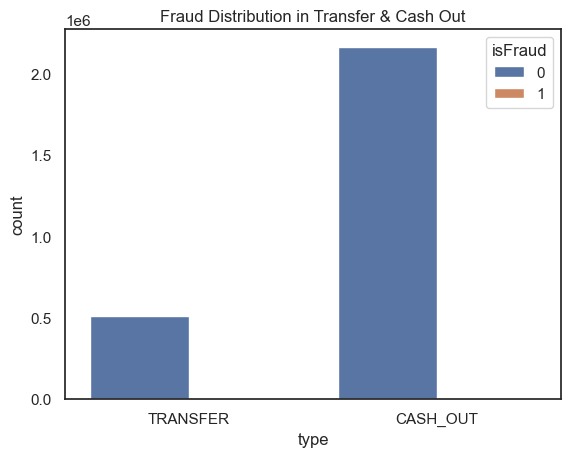

In [63]:
sns.countplot(data = fraud_types,x= "type", hue = "isFraud")
plt.title("Fraud Distribution in Transfer & Cash Out")
plt.show()

In [64]:
corr = df[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","isFraud"]].corr()

In [65]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007758,0.294065,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998799,0.066182,0.042029,0.010154
newbalanceOrig,-0.007758,0.998799,1.000000,0.067779,0.041878,-0.008059
oldbalanceDest,0.294065,0.066182,0.067779,1.000000,0.976717,-0.005798
newbalanceDest,0.459304,0.042029,0.041878,0.976717,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008059,-0.005798,0.000535,1.000000


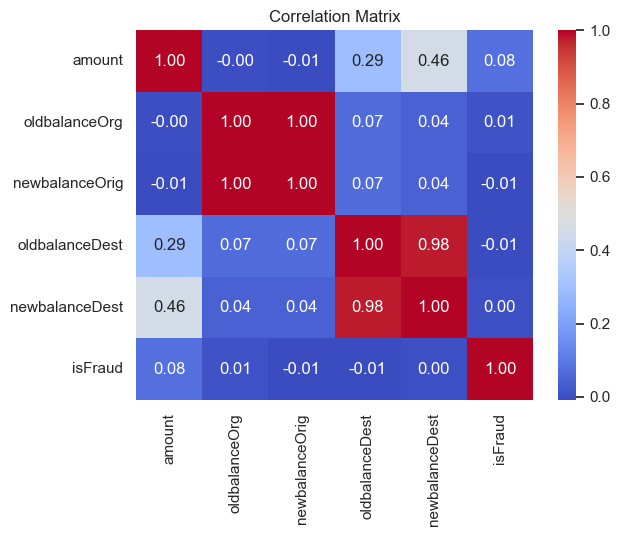

In [66]:
sns.heatmap(corr,annot = True,cmap = "coolwarm",fmt = ".2f")
plt.title("Correlation Matrix")
plt.show()

In [67]:
zero_after_transfer = df[
    (df["oldbalanceOrg"]>0)&
    (df["newbalanceOrig"] == 0) &
    (df["type"].isin(["TRANSPER","CASH_OUT"]))
    ]

In [68]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
3,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.0,0.00,1,0,181.00,21182.00
15,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.0,51513.44,0,0,15325.00,-46430.44
47,CASH_OUT,56953.90,C1570470538,1942.02,0.0,C824009085,70253.0,64106.18,0,0,1942.02,6146.82
51,CASH_OUT,23261.30,C2072313080,20411.53,0.0,C2001112025,25742.0,0.00,0,0,20411.53,25742.00
60,CASH_OUT,82940.31,C1528834618,3017.87,0.0,C476800120,132372.0,49864.36,0,0,3017.87,82507.64


In [69]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [71]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [72]:
df_model =df.drop(["nameOrig","nameDest","isFlaggedFraud"],axis = 1)

In [73]:
df_model.isnull().sum()

type                    0
amount                  0
oldbalanceOrg           0
newbalanceOrig     267230
oldbalanceDest     203603
newbalanceDest          0
isFraud                 0
balanceDiffOrig    267230
balanceDiffDest    203603
dtype: int64

In [74]:
df_model.fillna(0,inplace = True)

In [75]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [76]:
categorical = ["type"]
numeric = ["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]

In [87]:
df['type'].value_counts()

type
CASH_OUT    2165868
PAYMENT     2082597
CASH_IN     1354742
TRANSFER     515688
UNKNOWN      203603
DEBIT         40122
Name: count, dtype: int64

In [77]:
X = df_model.drop("isFraud",axis = 1)
y = df_model["isFraud"]

In [78]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,stratify = y)

In [79]:
preprocesser = ColumnTransformer(
    transformers= [
        ("num",StandardScaler(),numeric),
        ("cat",OneHotEncoder(drop = "first"),categorical)
    ]
)

In [80]:
pipeline = Pipeline([
    ("prep",preprocesser),
    ("clf",LogisticRegression(class_weight = "balanced",max_iter = 1000))
])

In [81]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [82]:
y_pred = pipeline.predict(X_test)

In [83]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97   1906322
           1       0.02      0.91      0.04      2464

    accuracy                           0.94   1908786
   macro avg       0.51      0.92      0.50   1908786
weighted avg       1.00      0.94      0.97   1908786



In [84]:
confusion_matrix(y_test,y_pred)

array([[1797188,  109134],
       [    233,    2231]])

In [85]:
pipeline.score(X_test,y_test)

0.9427033727196239

In [86]:
import joblib
joblib.dump(pipeline,"fraud_pipeline.pkl")

['fraud_pipeline.pkl']